- Пусть x(t) обозначает размер популяции хищников в момент времени t, а y(t) — размер популяции жертв. 
- Предполагается, что каждая популяция в отсутствие другой популяции подчиняется закону естественного роста, причем в популяции жертв коэффициент роста (удельная скорость роста популяции) положителен, т. е. популяция жертв неограниченно растет, а в популяции хищников этот коэффициент отрицателен, т. е. в отсутствие жертв хищники вымирают.

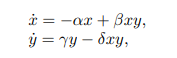

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sympy import * 

In [2]:
al, bt, gm, dl = symbols("alpha beta gamma delta",positive = True)
x, y = symbols("x y")

In [3]:
dxdt = -al * x + bt * x * y
dydt = gm * y - dl * x * y
display(dxdt, dydt)

-alpha*x + beta*x*y

-delta*x*y + gamma*y

In [6]:
fx = lambdify([x, y, al, bt], dxdt)
fy = lambdify([x, y, gm, dl], dydt)

In [9]:
 def dsdt(s, t, a, b, g, d):
        x, y = s
        return [fx(x, y, a, b), fy(x, y, g, d)]


- α = β = 0.5, γ = δ = 1.
- x(0) = 0.25, y(0) = 1.

In [57]:
# Найти численное решение с помощью (задание)
from scipy.integrate import odeint

def dsdt(s, t, a, b, g, d):
    x, y = s  # x хищники, y жертвы
    dx_dt = -a * x + b * x * y  # уравнение для хищников
    dy_dt = g * y - d * x * y   # уравнение для жертв
    return [dx_dt, dy_dt]

alpha = 0.5  # хищники вымирают без жертв
beta = 0.5   # как жертвы влияют на хищников
gamma = 1.0  # жертвы растут без хищников
delta = 1.0  # как хищники едят жертв

t = np.linspace(0, 20, 1000)

#нач. усл.
initial_conditions = [[0.25, 1]]  

print("численное решение")
for s0 in initial_conditions:
    solution = odeint(dsdt, s0, t, args=(alpha, beta, gamma, delta))
    print(f"для начальных условий x0={s0[0]}, y0={s0[1]}:")
    print("первые 5 точек решения (x хищники, y жертвы):")
    print(solution[:5]) 
print("\n")  

численное решение
для начальных условий x0=0.25, y0=1:
первые 5 точек решения (x хищники, y жертвы):
[[0.25       1.        ]
 [0.25001889 1.01512821]
 [0.25007592 1.03048442]
 [0.25017171 1.04607138]
 [0.25030688 1.06189165]]




изменение популяций во времени


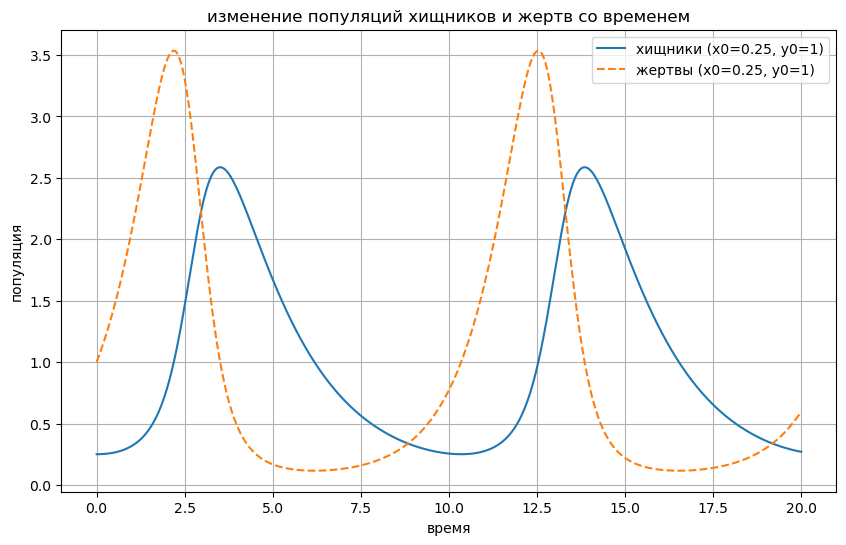

In [24]:
# Изобразить на одном полотне изменение популяции хищников и жертв современем (задание)

print("изменение популяций во времени")
plt.figure(figsize=(10, 6)) 
for s0 in initial_conditions:
    solution = odeint(dsdt, s0, t, args=(alpha, beta, gamma, delta))
    x = solution[:, 0]  
    y = solution[:, 1]  
    plt.plot(t, x, label=f"хищники (x0={s0[0]}, y0={s0[1]})")  # сплошная линия
    plt.plot(t, y, '--', label=f"жертвы (x0={s0[0]}, y0={s0[1]})")  # пунктир
plt.xlabel("время")
plt.ylabel("популяция")
plt.title("изменение популяций хищников и жертв со временем")
plt.grid(True) 
plt.legend()  
plt.show()

фазовый портрет


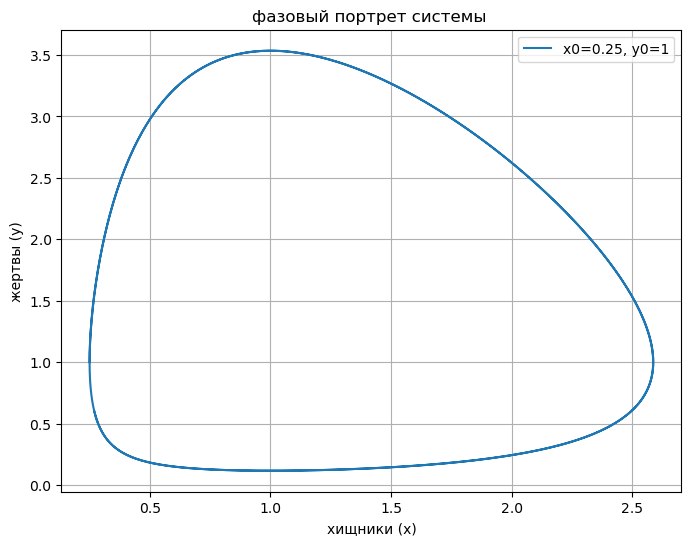

In [26]:
# Изобразить фазовый портрет (система координат хищник-жетва) (задание)

print("фазовый портрет")
plt.figure(figsize=(8, 6))
for s0 in initial_conditions:
    solution = odeint(dsdt, s0, t, args=(alpha, beta, gamma, delta))
    x = solution[:, 0]  
    y = solution[:, 1] 
    plt.plot(x, y, label=f"x0={s0[0]}, y0={s0[1]}")  # траектория
plt.xlabel("хищники (x)")
plt.ylabel("жертвы (y)")
plt.title("фазовый портрет системы ")
plt.grid(True)
plt.legend()
plt.show()


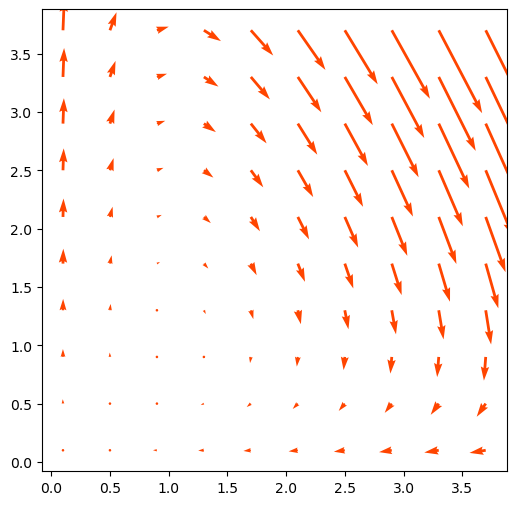

In [18]:
fig, ax = plt.subplots(figsize = (6, 6))
xrange = np.arange(0.1, 4.05, 0.4)
yrange = np.arange(0.1, 4.05, 0.4)
X, Y = np.meshgrid(xrange, yrange)
U = fx(X, Y, 0.5, 0.5)
V = fy(X, Y, 1.0, 1.0)
ax.quiver(X, Y, U, V, color = "orangered")
plt.show()

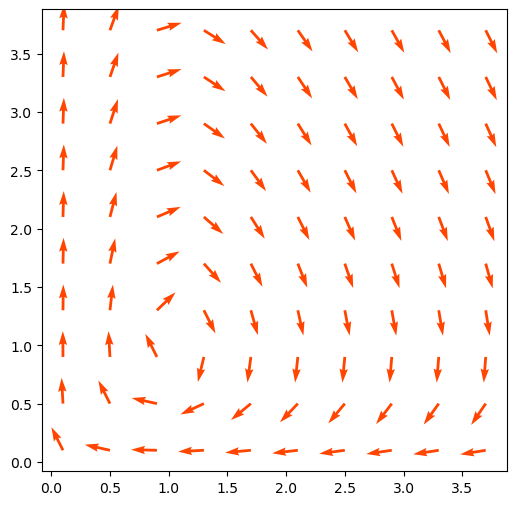

In [28]:
fig, ax = plt.subplots(figsize = (6, 6))
U1 = U / np.sqrt(U ** 2 + V ** 2)
V1 = V / np.sqrt(U ** 2 + V ** 2)
ax.quiver(X, Y, U1, V1, color = "orangered")
plt.show()

NameError: name 'dsol' is not defined

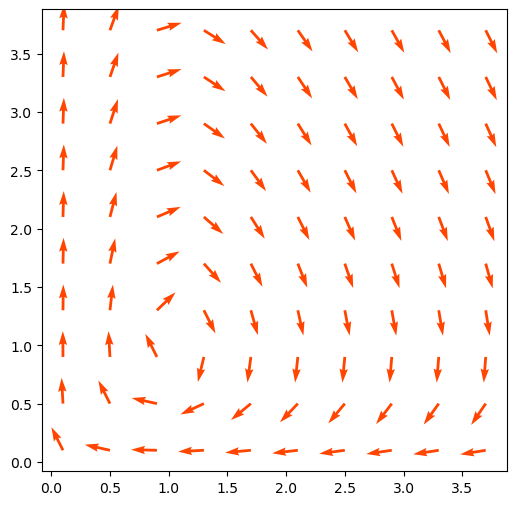

In [30]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.quiver(X, Y, U1, V1, color = "orangered")
ax.plot(dsol.T[0][:216], dsol.T[1][:216],"skyblue", lw = 3)
plt.show()

In [32]:
# Что показывают последние два рисунка? (задание)
# В чём отличие последних двух рисунков? (задание)
# Вопрос 1.
# рисунок 1: векторное поле (нормализованное),стрелки одинаковой длины, показывающие направление движения системы  в координатах (хищники, жертвы).
# рисунок 2: то же нормализованное векторное поле, но с добавленной траекторией (синяя линия) для начальных условий
# Вопрос 2.
# только нормализованное векторное поле (стрелки направления).
# добавлена траектория решения, показывающая реальный путь популяций в фазовой плоскости.

In [34]:
yf = Function("y")(x)
ode = Eq(diff(yf, x), (dydt / dxdt).subs(y, yf))
display(ode)
plt.show()

ValueError: cannot derive by this array

In [37]:
dsol2 = dsolve(ode, yf, hint = "separable",simplify = False)
display(dsol2)

NameError: name 'ode' is not defined

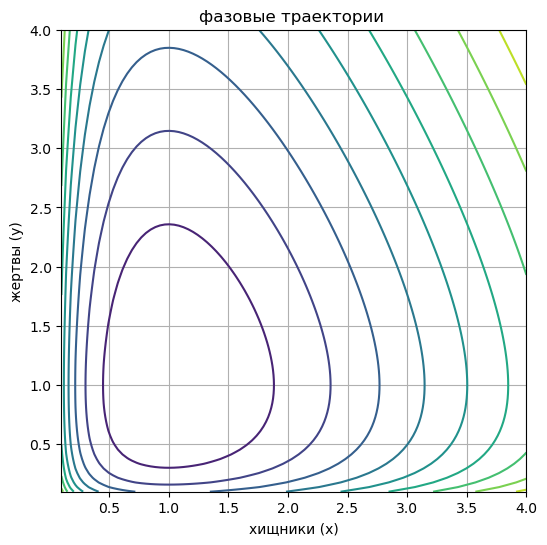

In [43]:
# Объясните полученный выше результат (задание)
# вообще plt.show() ничего не рисует, так как нет команд для графика
# результат это контурный график с замкнутыми или открытыми кривыми, показывающими, как популяции хищников и жертв изменяются относительно друг друга
x_vals = np.linspace(0.1, 4, 100)  
y_vals = np.linspace(0.1, 4, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z = 0.5 * Y - 0.5 * np.log(np.abs(Y)) - np.log(np.abs(X)) + X

plt.figure(figsize=(6, 6))
plt.contour(X, Y, Z, levels=10, cmap="viridis") 
plt.xlabel("хищники (x)")
plt.ylabel("жертвы (y)")
plt.title("фазовые траектории ")
plt.grid(True)
plt.show()

In [47]:
C1 = symbols("C1")
csol = solveset(dsol2, C1).args[0]
csol = csol.subs(yf, y)
display(Eq(csol, C1))

NameError: name 'dsol2' is not defined

In [55]:
# Объясните полученный выше результат (задание)
#solveset выделяет C1. Это выражение константа, которая определяет траектории в фазовой плоскости. 
#Каждая траектория соответствует своей конст. показывая, как популяции меняются вместе


NameError: name 'dsol2' is not defined

In [51]:
par2 = dict(zip([al, bt, gm, dl], par))
cf = lambdify([x, y], csol.subs(par2))
xrange = np.arange(0.01, 4, 0.01)
yrange = np.arange(0.01, 4, 0.01)
X1, Y1 = np.meshgrid(xrange, yrange)
C = cf(X1, Y1)
fig, ax = plt.subplots(figsize = (6, 6))
ax.contour(X1, Y1, C, levels = 50,colors = "skyblue")
plt.show()

NameError: name 'par' is not defined

In [53]:
# Объясните полученный выше результат (задание)


In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.contour(X1, Y1, C, levels = 50,
colors = "skyblue")
ax.quiver(X, Y, U1, V1, color = "orangered")
plt.show()

In [ ]:
# Объясните полученный выше результат
